In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import os 
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

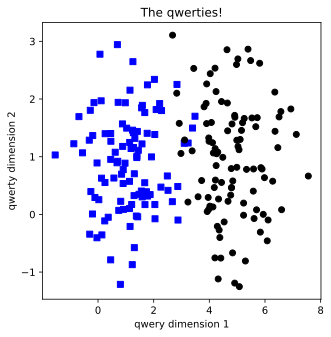

In [13]:
# create data
nPerClust = 100
blur = 1
A = [1,1]
B = [5,1]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show die data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0] , data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0] , data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwery dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [14]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [16]:
# build the  model
ANNclassify = nn.Sequential(
    nn.Linear(2,1), # input layer 
    nn.ReLU(),      # activation unit
    nn.Linear(1,1), # output unit
    nn.Sigmoid(),   # final activation unit ( here for coonceptual reasons; in practice,)
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [21]:
# other model features
learningRate = .01

# loss function
lossfun = nn.BCELoss() # wieso BCE? learning metaparameters are bether with bse 

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=.01)


In [22]:
#training the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)
    
    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()





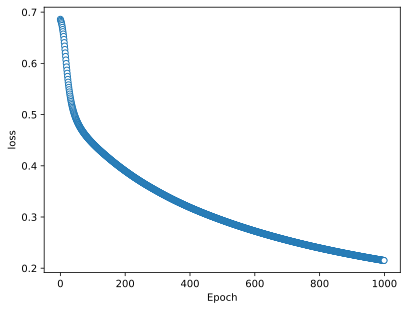

In [23]:
# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()